# Importando dados

importando as bibliotecas que usaremos no ao longo do projeto.

In [1]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
     ---------------------------------------- 7.6/7.6 MB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 7.7 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 5.7 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 6.2 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

     --------------------------------------- 10.6/10.6 MB 17.2 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Bibliotecas padrão para manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [4]:
# Importando o dataframe
df_original = pd.read_csv('C:/Users/Winicius/Desktop/LightHouse/teste_indicium_precificacao.csv', sep = ',')

In [5]:
# Criando uma cópia para casos de fazer alterações, ainda teremos o principal
df = df_original.copy()

# Análise Explratória dos dados (EDA)

In [6]:
# Visualizando as 5 primeiras colunas para nos familiarizarmos com os dados
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [7]:
# Verificando o tamanho do Dataframe
df.shape

(48894, 16)

In [8]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [9]:
# Verificando a quantidade de valores faltantes
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [10]:
# Verificando a porcentagem dos valores faltantes
(df.isnull().sum()/df.shape[0]*100).round(3)

id                                0.000
nome                              0.033
host_id                           0.000
host_name                         0.043
bairro_group                      0.000
bairro                            0.000
latitude                          0.000
longitude                         0.000
room_type                         0.000
price                             0.000
minimo_noites                     0.000
numero_de_reviews                 0.000
ultima_review                    20.559
reviews_por_mes                  20.559
calculado_host_listings_count     0.000
disponibilidade_365               0.000
dtype: float64

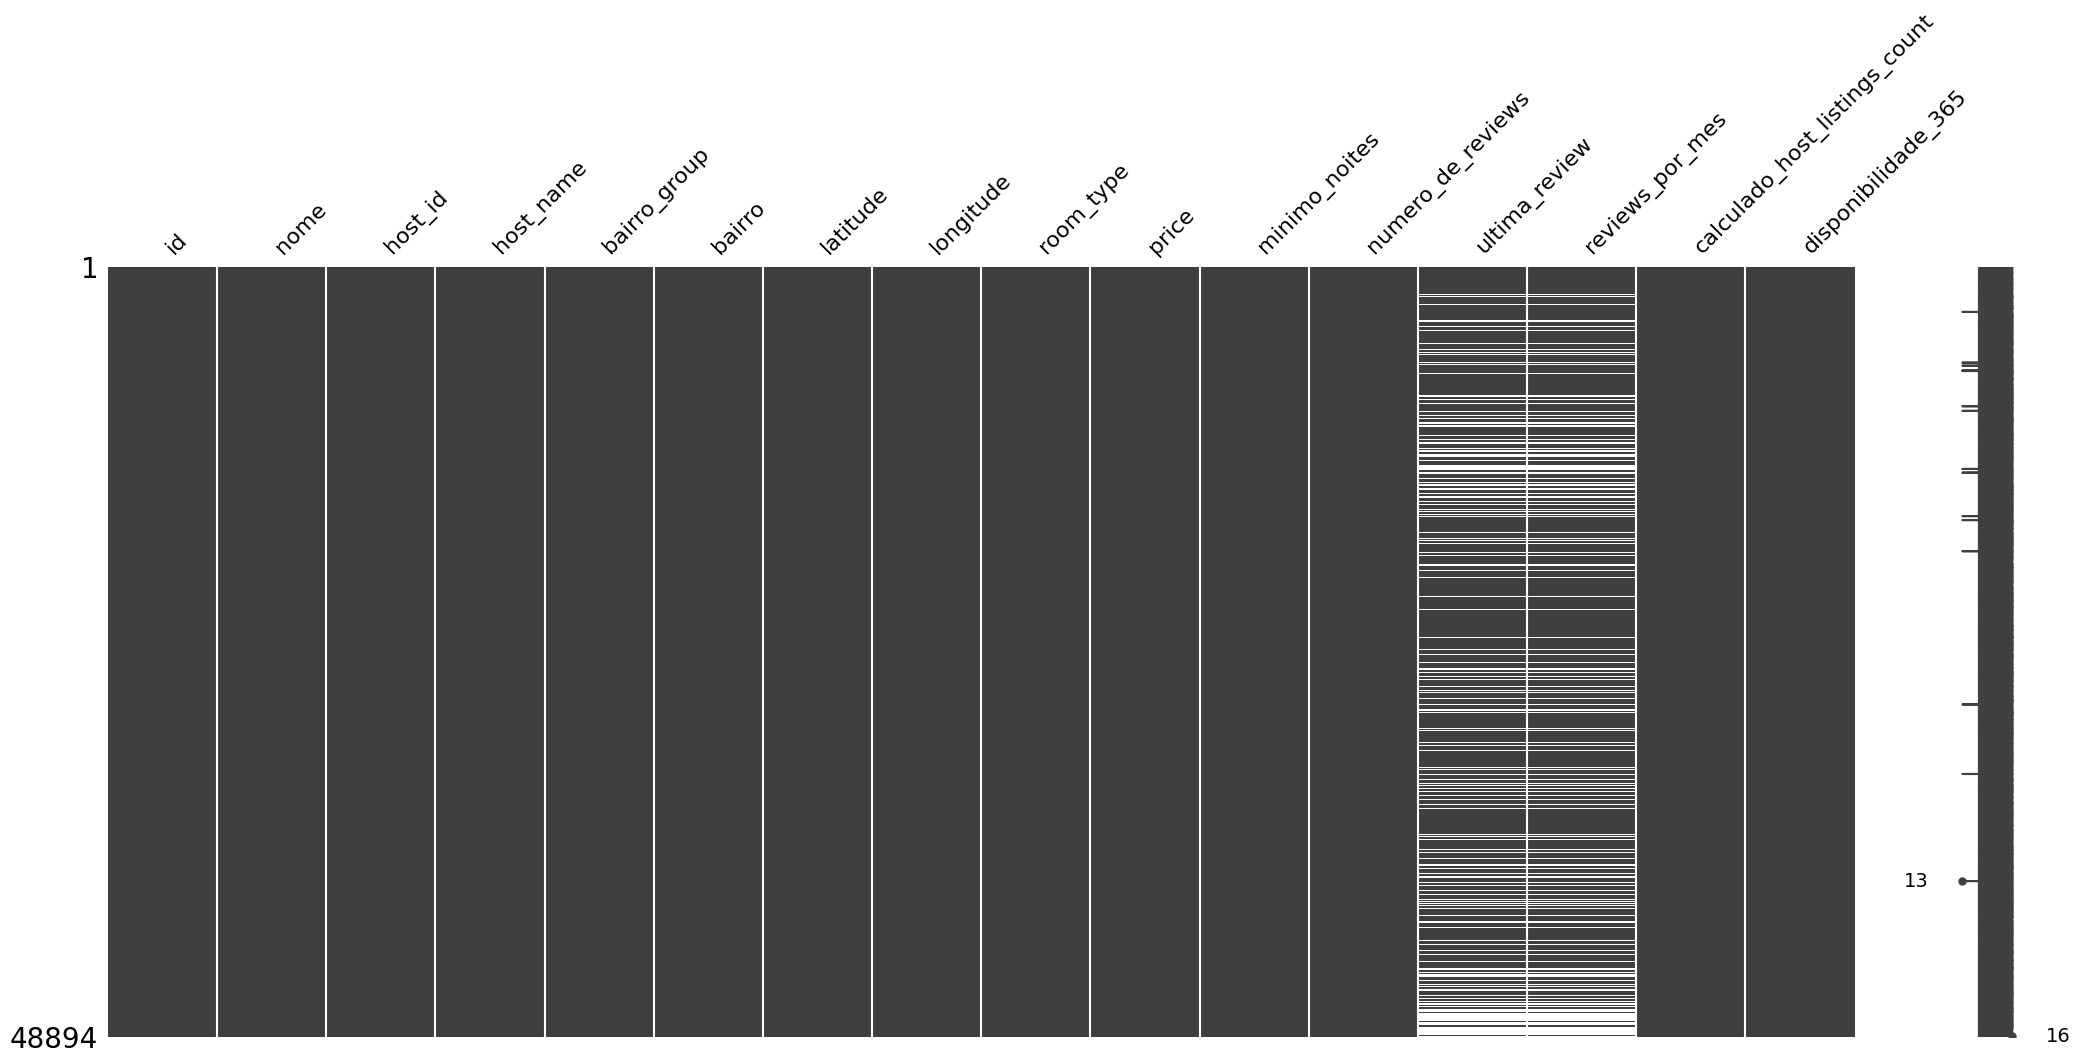

In [11]:
missingno.matrix(df);

Podemos observar que as variáveis última_review e reviews_por_mês são as que têm mais valores ausentes, com aproximadamente 20% em cada uma.